# Loading first batch of images

### Import Libraries, Load batch 1 image data into dictionary.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

####  Test reading CIFAR uncompressed file into memory.
# File already unzipped using MinGW tar command into 6 batches.
# File is binary format, pickle used to save in binary format.
####
import pickle

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

file = "cs231n\datasets\cifar-10-batches-py\data_batch_1"

data = unpickle(file)    


In [3]:
len(data)

4

In [4]:
data.keys()
# Returned dictionary has 4 keys, 'batch_label', 'labels', 'data', 'filenames'.
# Main interest is in 'data' which is an array of flattened image rows
# and 'labels' which is a number for categories from 1 to 10.

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [5]:
data['data'][0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [6]:
len(data['data'][0])
# Row length is 3072.  1024 x 3 colors.  32 x 32 is 2014.

3072

In [7]:
type(data['data'])
len(data['data'])
# Column length of data is 10,000.  
# Data is ndarray type of 3072 rows by 10,000 columns.

10000

In [8]:
len(data['labels'])
# n is 10,000

10000

In [9]:
data['labels'][0:10]  
# first 10 labels

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]

In [10]:
min(data['labels']), max(data['labels'])
# Labels goes from 0 to 9, alphabetically.

(0, 9)

### Save first 10 data and fist 10 labels to file.

In [31]:
# Save just first 10 array items to build knn distance.
arr10 = data['data'][0:10]
labels10 = data['labels'][0:10]
print(arr10, labels10)


[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 28  30  33 ... 100  99  96]
 [134 131 128 ... 136 137 138]
 [125 110 102 ...  82  84  86]] [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [39]:
np.save("arr10.npy", arr10)


In [36]:
#  Test reloading from file.
new = np.load("arr10.npy")
print(len(new))
print(new[0])
print(new[9])

10
[ 59  43  50 ... 140  84  72]
[125 110 102 ...  82  84  86]


In [40]:
np.save("labels10.npy", labels10)

In [41]:
newlabel = np.load("labels10.npy")
print(newlabel)

[6 9 9 4 1 1 2 7 8 3]


### Build image back from single flattend row.

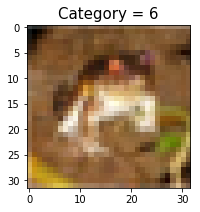

In [12]:
# From flattened single row, build up a 2d and 3 color image.
# Use first row as test case.  Label for first image is 6 (frog).
arr = data['data'][0]
label = data['labels'][0]

def imgbuild(arr, label):
    # Build 3 colors, then reshape into 32x32 2d image.
    R = arr[0:1024].reshape(32,32)/255.0
    G = arr[1024:2048].reshape(32,32)/255.0
    B = arr[2048:].reshape(32,32)/255.0
    img = np.dstack((R,G,B))
    
    # Format figure
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='none')
    ax.set_title('Category = '+ str(label), fontsize =15)
    
imgbuild(arr, label)    

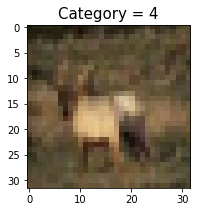

In [13]:
# Try a couple of other rows.  Call imgbuild function.
# Category is 4 (horse).
arr3 = data['data'][3]
label3 = data['labels'][3]
imgbuild(arr3, label3)   

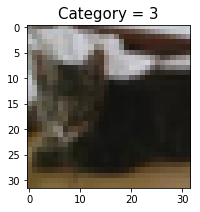

In [14]:
# Try a couple of other rows.  Call imgbuild function.
# Category is 3 (cat).
arr9 = data['data'][9]
label9 = data['labels'][9]
imgbuild(arr9, label9)   

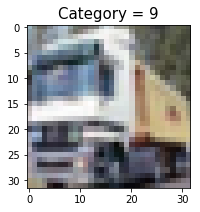

In [15]:
# Try a couple of other rows.  Call imgbuild function.
# Category is 9 (truck).
arr1 = data['data'][1]
label1 = data['labels'][1]
imgbuild(arr1, label1)   

# 

### Try to image first array. -- do later 

#### inserting a local image file in markdown cell: 
<img src="horse.png">

In [16]:
# <img src="path\file.png"> in a markdown cell would do it.

In [17]:
arr = data['data'][0]
# Need to recreate 2D and r, g, b, channels separately.
# Build the flattened row into 32 x 32 x 3 colors array again, before imaging.

In [18]:
data['labels'][0:10]


[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]

In [19]:
data['batch_label']

'training batch 1 of 5'

In [20]:
data['filenames'][0:10]

['leptodactylus_pentadactylus_s_000004.png',
 'camion_s_000148.png',
 'tipper_truck_s_001250.png',
 'american_elk_s_001521.png',
 'station_wagon_s_000293.png',
 'coupe_s_001735.png',
 'cassowary_s_001300.png',
 'cow_pony_s_001168.png',
 'sea_boat_s_001584.png',
 'tabby_s_001355.png']

## Load all 6 batches in a loop, CIFAR10 files

In [21]:
# Get a list of category names from batches.meta file.
names = unpickle('cs231n\datasets\cifar-10-batches-py\batches.meta')

# Initialize empty lists to hold data array, labels category numbers.
data, labels = [], []

for i in range(1, 2):  # test with just 1 loop first.
    filename = "cs231n\datasets\cifar-10-batches-py\data_batch_" + str(i)
    batch_data = unpickle(filename)
    if False:
        pass
    else:
        data = batch_data['data']   # reads array of pixel color numbers.
        labels = batch_data['labels']  # read category numbers.
        
print(data, labels, names)        

OSError: [Errno 22] Invalid argument: 'cs231n\\datasets\\cifar-10-batches-py\x08atches.meta'

In [10]:
import pickle

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='bytes')
    fo.close()
    return dict

file2 = "cs231n\datasets\cifar-10-batches-py\batches.meta"

data2 = unpickle(file2)  

OSError: [Errno 22] Invalid argument: 'cs231n\\datasets\\cifar-10-batches-py\x08atches.meta'